# Métodos predictivos: tarea de asignación (semana 2)
Ya conoces una gran variedad de métodos de regresión múltiple y cómo pueden ajustarse utilizando las librerías *statsmodels* y *scikit-learn*. El objetivo de esta tarea es analizar un conjunto de datos y comparar varios métodos de regresión múltiple para estudiar cómo de bien se ajustan a los datos.

## Descripción de la tarea
La tarea consta de tres apartados:
1. Selección y análisis de un conjunto de datos.
2. Ejecución de dos métodos de regresión múltiple.
3. Evaluación de los modelos de regresión obtenidos, analizando cuál de ellos consigue un mejor ajuste a los datos.

## Instrucciones
En este *notebook* no se presenta parte del código desarrollado, pero sí se indican los pasos mínimos que debe seguir el estudiante para completar la tarea. El estudiante puede añadir otras celdas de código según sea necesario, pero respetando la organización de apartados propuesta. El estudiante puede elegir entre trabajar con *statsmodels* o con *scikit-learn*.


## 1. Selección y análisis de un conjunto de datos
Paso 1.1: Importa los paquetes necesarios.

In [28]:
#COMPLETAR
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, ElasticNet
import pandas as pd
import seaborn as sns

Paso 1.2: Carga un conjunto de datos de entre los disponibles en la librería seleccionada. Puedes encontrarlos en:


*   statsmodels: https://www.statsmodels.org/stable/datasets/index.html
*   scikit-learn: https://scikit-learn.org/stable/datasets.html



In [29]:
#COMPLETAR
dataset = load_boston()

Paso 1.3: Muestra información acerca de la distribución de las características en el conjunto de datos elegido.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


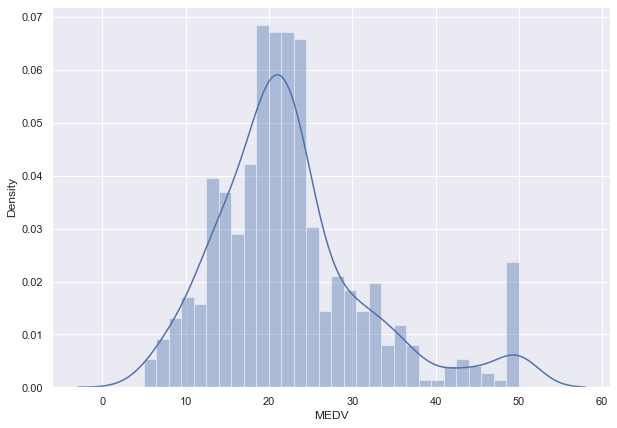

In [30]:
#COMPLETAR
data = pd.DataFrame(dataset["data"], columns=dataset["feature_names"])
target = pd.DataFrame(dataset["target"], columns= ["MEDV"])

data["MEDV"] = target["MEDV"]

sns.set(rc={'figure.figsize': (10, 7)})
sns.distplot(data["MEDV"], bins=30)

data.describe()


<AxesSubplot:>

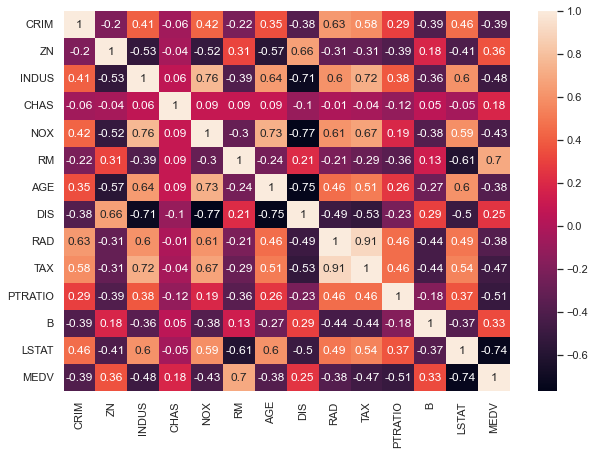

In [31]:
corr_mat = data.corr().round(2)

sns.heatmap(data=corr_mat, annot=True)

Paso 1.4: Si es necesario, realiza un preprocesado de las variables (eliminar valores perdidos, escalar valores, etc).

In [32]:
#COMPLETAR
y = data["MEDV"]
x = data[["LSTAT", "RM", "PTRATIO"]]

*Añade aquí una breve explicación de las decisiones tomadas en el apartado 1.*

## 2. Ejecución de métodos de regresión múltiple
Paso 2.1: Particiona el conjunto de datos en entrenamiento y test.

In [33]:
#COMPLETAR
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


Paso 2.2: Configura y realiza el ajuste del primer método de regresión elegido. Utiliza solo la partición de entrenamiento.

In [34]:
#COMPLETAR
alg = ElasticNet(alpha=1) # Este modelo utiliza la regularización l1 y l2

modelo_eln = alg.fit(x_train, y_train)

Paso 2.3: Configura y realiza el ajuste del segundo método de regresión elegido. Utiliza solo la partición de entrenamiento.

In [35]:
#COMPLETAR
alg = Ridge(alpha=1) # Este modelo utiliza la regularización l2

modelo_ridge = alg.fit(x_train, y_train)

*Añade aquí una breve explicación de las decisiones tomadas en el apartado 2*

## 3. Evaluación de los modelos de regresión obtenidos


Paso 3.1: Muesta la información sobre los modelos obtenidos (valores de los coeficientes, calidad del ajuste, estadísticos, etc.)

In [36]:
print("ElasticNet - intercepto: " + str(modelo_eln.intercept_))
print("ElasticNet - coeficientes :", list(zip(x_train.columns, modelo_eln.coef_.flatten(), )))
print("ElasticNet - R^2: " + str(modelo_eln.score(x_train, y_train)))

ElasticNet - intercepto: 40.14932287966003
ElasticNet - coeficientes : [('LSTAT', -0.7843682145458715), ('RM', 1.4541016868378007), ('PTRATIO', -0.9183264344627039)]
ElasticNet - R^2: 0.6881161747164475


In [37]:
#COMPLETAR
print("Ridge - intercepto: " + str(modelo_ridge.intercept_))
print("Ridge - coeficientes :", list(zip(x_train.columns, modelo_ridge.coef_.flatten(), )))
print("Ridge - R^2: " + str(modelo_ridge.score(x_train, y_train)))


Ridge - intercepto: 12.52959622441923
Ridge - coeficientes : [('LSTAT', -0.544835002399103), ('RM', 5.497088047028453), ('PTRATIO', -0.9664128571933318)]
Ridge - R^2: 0.7447015523414049


Paso 3.2: Utiliza los modelos obtenidos en el apartado anterior para predecir sobre la partición de test.

In [38]:
#COMPLETAR

y_pred_eln = modelo_eln.predict(x_test)
y_pred_eln_train = modelo_eln.predict(x_train)

y_pred_ridge = modelo_ridge.predict(x_test)
y_pred_ridge_train = modelo_ridge.predict(x_train)

Paso 3.3: Calcula métricas de evaluación para estudiar la calidad de la estimación

In [39]:
print("Test evaluation: ")
print("ElasticNet - RMSE: " + str(mean_squared_error(y_test, y_pred_eln)))
print("ElasticNet - MAE: " + str(mean_absolute_error(y_test, y_pred_eln)))
print("ElasticNet - R_2: " + str(r2_score(y_test, y_pred_eln)))

Test evaluation: 
ElasticNet - RMSE: 36.756361020471665
ElasticNet - MAE: 4.178058555656632
ElasticNet - R_2: 0.548270783302899


In [40]:
print("Test evaluation: ")
print("Ridge - RMSE: " + str(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge - MAE: " + str(mean_absolute_error(y_test, y_pred_ridge)))
print("Ridge - R_2: " + str(r2_score(y_test, y_pred_ridge)))

Test evaluation: 
Ridge - RMSE: 38.966267617568064
Ridge - MAE: 3.9292431210515284
Ridge - R_2: 0.5211114196345501


*Añade aquí una breve explicación de los resultados obtenidos en el apartado 3.*